In [1]:
from keras import models, layers, optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os, shutil
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle
!kaggle datasets download -d biaiscience/dogs-vs-cats
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519.jpg  
  inflating: train/train/dog.552.

In [4]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'train/train'

# The directory where we will
# store our smaller dataset
base_dir = 'cats_and_dogs_small'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
  os.mkdir(base_dir)
  os.mkdir(train_dir)
  os.mkdir(validation_dir)
  os.mkdir(test_dir)
  os.mkdir(train_cats_dir)
  os.mkdir(train_dogs_dir)
  os.mkdir(validation_cats_dir)
  os.mkdir(validation_dogs_dir)
  os.mkdir(test_cats_dir)
  os.mkdir(test_dogs_dir)
except OSError:
  pass

No. of images 3


In [8]:
%ls
def copyImages(label, start, end, target_dir):
  fnames = [label+'.{}.jpg'.format(i) for i in range(start, end)]
  for fname in fnames:
      src = os.path.join(original_dataset_dir, fname)
      dst = os.path.join(target_dir, fname)
      shutil.copyfile(src, dst)

copyImages('cat',0,1000,train_cats_dir)
copyImages('cat',1000,1500,validation_cats_dir)
copyImages('cat',1500,2000,test_cats_dir)

copyImages('dog',0,1000,train_dogs_dir)
copyImages('dog',1000,1500,validation_dogs_dir)
copyImages('dog',1500,2000,test_dogs_dir)

cats_and_dogs_small/  kaggle.json  test/  train/


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
  print(data_batch.shape, labels_batch.shape)
  break

(20, 150, 150, 3) (20,)


In [21]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
100/100 [==============================] - 11s 111ms/step - loss: 0.2381 - acc: 0.9100 - val_loss: 0.5949 - val_acc: 0.7430
Epoch 2/30
100/100 [==============================] - 11s 113ms/step - loss: 0.2062 - acc: 0.9270 - val_loss: 0.6405 - val_acc: 0.7500
Epoch 3/30
100/100 [==============================] - 11s 110ms/step - loss: 0.1963 - acc: 0.9245 - val_loss: 0.6332 - val_acc: 0.7440
Epoch 4/30
100/100 [==============================] - 11s 113ms/step - loss: 0.1762 - acc: 0.9335 - val_loss: 0.6137 - val_acc: 0.7570
Epoch 5/30
100/100 [==============================] - 11s 114ms/step - loss: 0.1540 - acc: 0.9450 - val_loss: 0.6872 - val_acc: 0.7290
Epoch 6/30
100/100 [==============================] - 11s 111ms/step - loss: 0.1419 - acc: 0.9510 - val_loss: 0.8496 - val_acc: 0.7110
Epoch 7/30
100/100 [==============================] - 11s 111ms/step - loss: 0.1203 - acc: 0.9640 - val_loss: 0.7314 - val_acc: 0.7370
Epoch 8/30
100/100 [==============================] - 1

In [22]:
model.save('cats_and_dogs_small_1.h5')

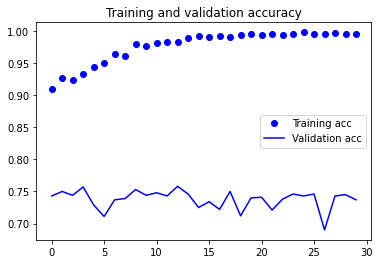

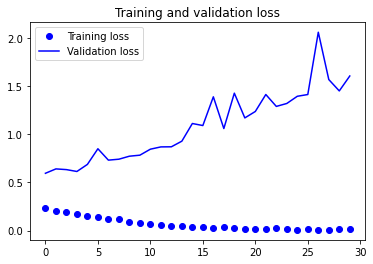

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit(train_generator, epochs=100, validation_data=validation_generator, verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/63 - 19s - loss: 0.6936 - acc: 0.5130 - val_loss: 0.6866 - val_acc: 0.5000
Epoch 2/100
63/63 - 19s - loss: 0.6855 - acc: 0.5440 - val_loss: 0.6745 - val_acc: 0.5920
Epoch 3/100
63/63 - 19s - loss: 0.6782 - acc: 0.5730 - val_loss: 0.6919 - val_acc: 0.5060
Epoch 4/100
63/63 - 19s - loss: 0.6623 - acc: 0.6035 - val_loss: 0.6770 - val_acc: 0.5540
Epoch 5/100
63/63 - 19s - loss: 0.6573 - acc: 0.5845 - val_loss: 0.6675 - val_acc: 0.5780
Epoch 6/100
63/63 - 19s - loss: 0.6428 - acc: 0.6265 - val_loss: 0.6565 - val_acc: 0.5970
Epoch 7/100
63/63 - 20s - loss: 0.6288 - acc: 0.6325 - val_loss: 0.6187 - val_acc: 0.6390
Epoch 8/100
63/63 - 19s - loss: 0.6227 - acc: 0.6475 - val_loss: 0.7035 - val_acc: 0.5770
Epoch 9/100
63/63 - 19s - loss: 0.6158 - acc: 0.6470 - val_loss: 0.5881 - val_acc: 0.6820
Epoch 10/100
63/63 - 18s - loss: 0.6096 - acc: 0.6570 - val_loss: 0.6020 - val_acc: 0.6470
Epoch 11/100
63

In [34]:
model.save('cats_and_dogs_small_2.h5')

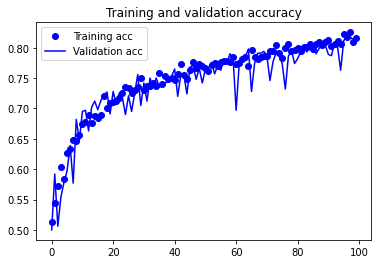

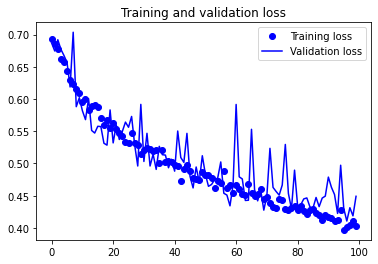

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()